# ML Assignment 1: Intro to Machine Learning
# Nilesh Sonune | 16D070004

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [3]:
import pandas as pd

In [5]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
train = pd.read_csv(data_url)

In [6]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.

* You can also refer to the pre-work material for the first lecture on ML.  

# Importing Libraries

In [7]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, accuracy_score
import xgboost as xgb
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings('ignore')

seed = 7

# Data Analysis

In [8]:
# get information about numerical data
train.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,...,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,...,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,...,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,...,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


In [9]:
# get information about categorical data
train.describe(include=['O'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1028,1028,1028,1028,1028,1028,1028
unique,3,3,6,2,9,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,729,683,427,597,223,454,726


In [10]:
# looking at datatypes
print(train.dtypes)

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [11]:
# size of the dataset
train.shape

(1028, 34)

In [12]:
train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'ID'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237862FD710>,
      dtype=object)

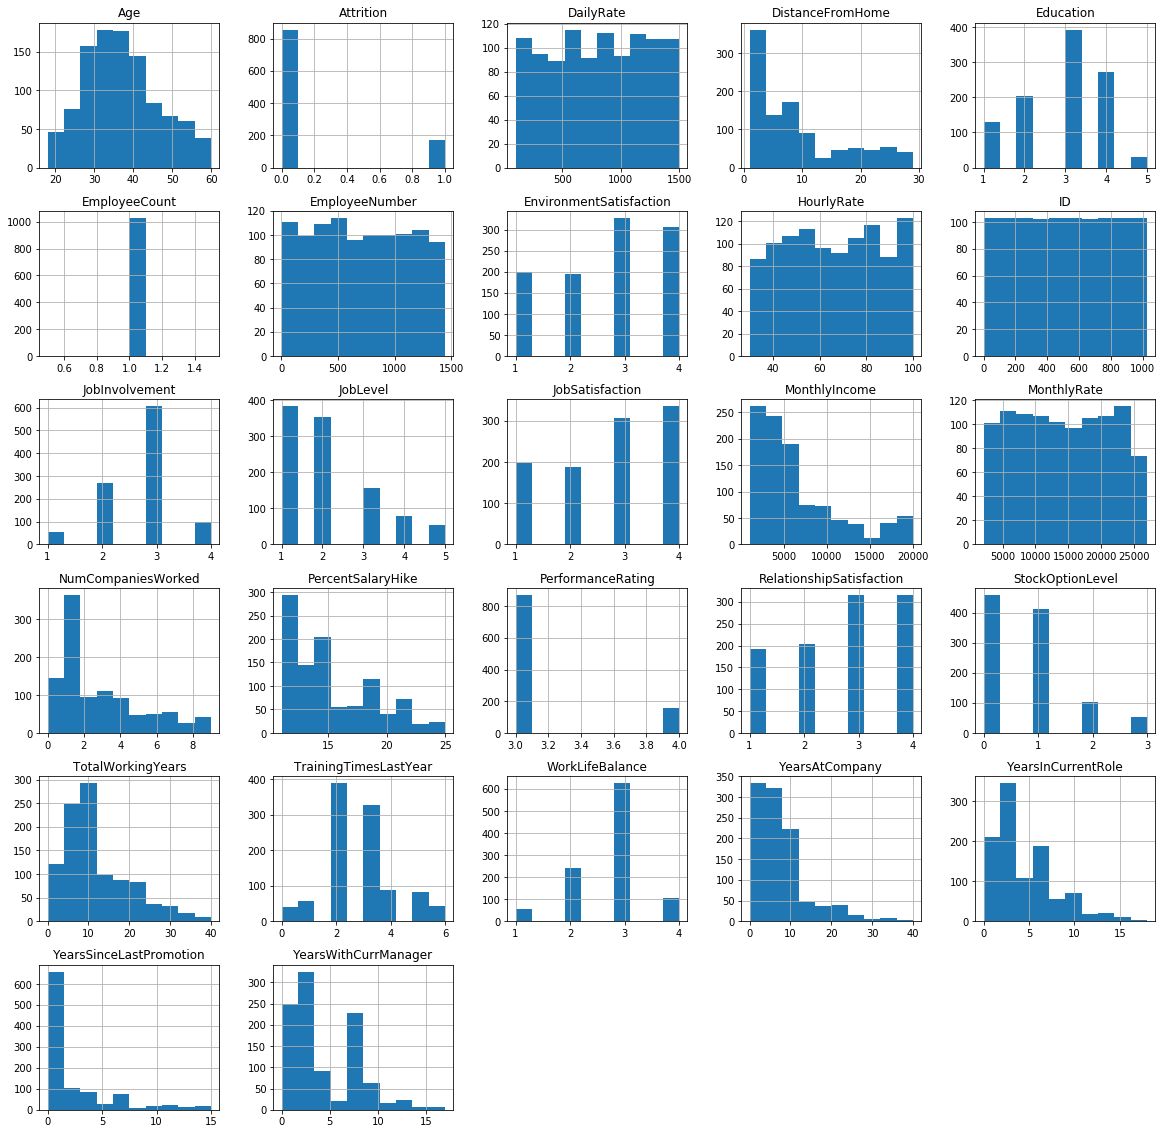

In [13]:
train.hist(figsize = (20,20))

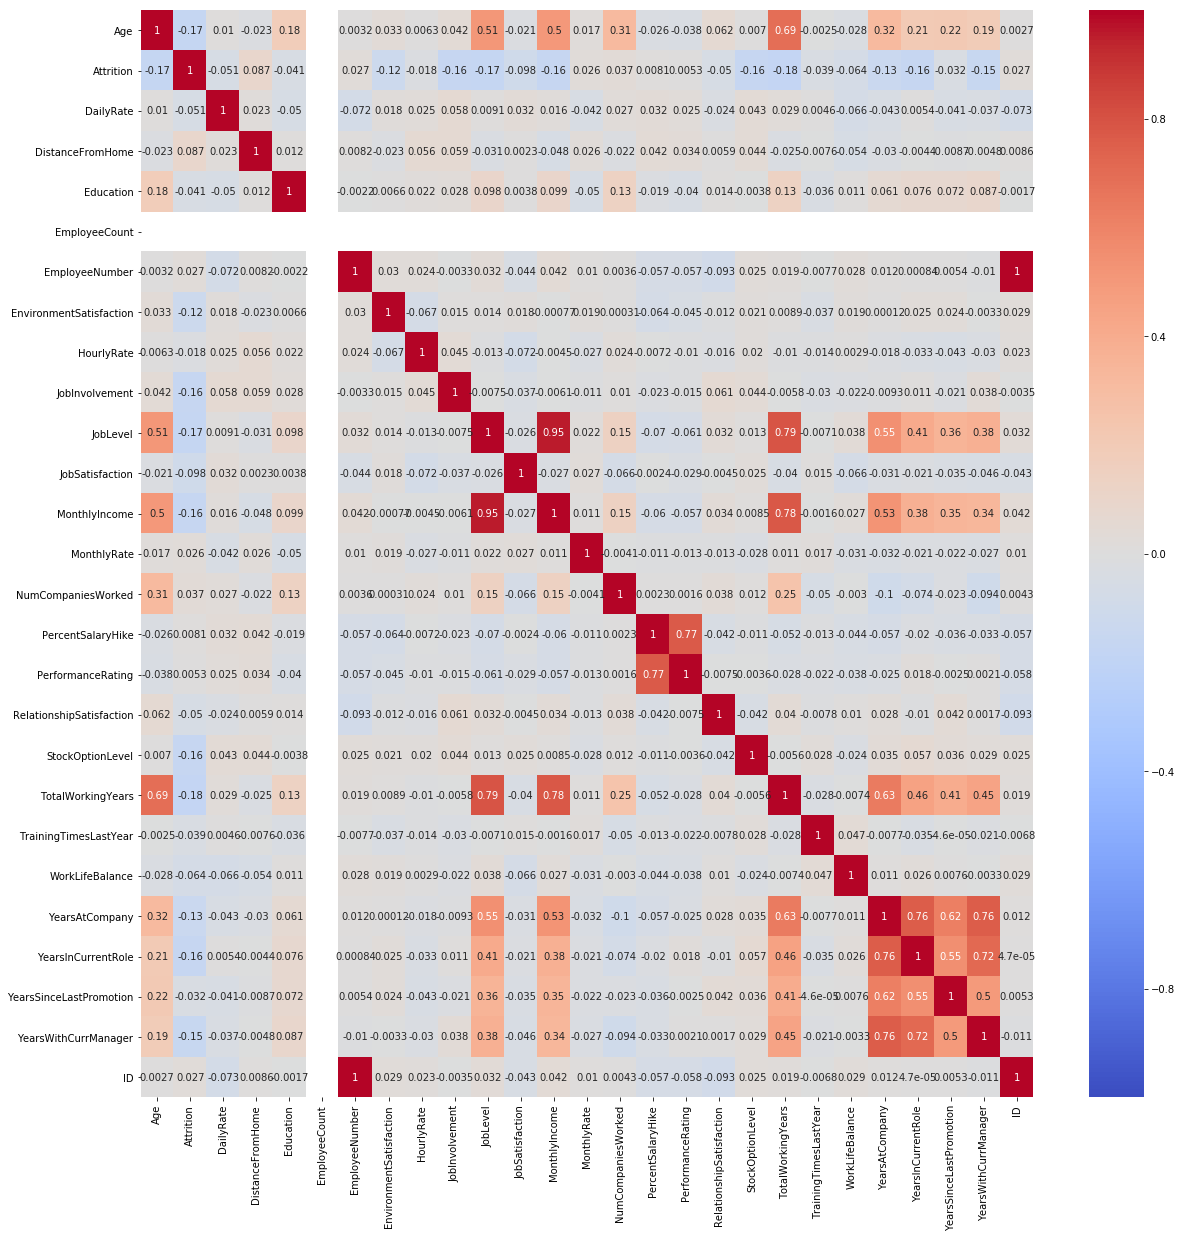

In [14]:
corr_values = train.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr_values, vmin = -1, cmap="coolwarm", annot=True)
plt.show()

# Data Preprocessing 

In [15]:
num_cols = ['Age', 'DailyRate','DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
            'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel',
            'TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager']

cat_cols = ['BusinessTravel', 'Department', 'EducationField','JobRole','MaritalStatus']
bin_cols = ['Gender', 'OverTime']
outputs  = ['Attrition']

In [16]:
# Drop useless features
train = train.drop(columns=['EmployeeNumber', 'EmployeeCount','ID'])

In [17]:
# Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    train[i] = le.fit_transform(train[i])

In [18]:
# One hot encoding multi-label columns
train = pd.get_dummies(data = train, columns = cat_cols )

In [19]:
# Normalizing Numerical columns
std = StandardScaler()
scaled = std.fit_transform(train[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

train = train.drop(columns = num_cols, axis = 1)  
train = train.merge(scaled, left_index=True, right_index=True, how = "left")

In [20]:
train.head()

,Attrition,Gender,OverTime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,0,1,0,0,1,0,...,-0.424562,-1.592005,-0.907787,-0.426549,-2.127266,-2.509908,-0.174268,-0.072650,-0.672389,0.238154
1,0,1,0,0,1,0,0,1,0,0,...,2.355371,1.164729,0.288630,-0.176909,0.177085,0.336408,0.459323,0.754111,-0.368157,0.792676
2,1,1,1,0,0,1,0,1,0,0,...,-0.424562,-0.673094,-0.907787,-0.551369,0.177085,0.336408,-1.124656,-1.174997,-0.672389,-1.148154
3,0,0,1,0,1,0,0,1,0,0,...,-0.424562,0.245818,-0.907787,-0.426549,0.177085,0.336408,0.142527,0.754111,0.240308,-1.148154
4,0,1,0,0,0,1,0,1,0,0,...,-0.424562,1.164729,0.288630,-0.676189,0.177085,0.336408,-0.807860,-0.623823,-0.063924,-0.593631


In [21]:
# Separate the target variable
y = np.array(train.Attrition.tolist())
train = train.drop('Attrition', axis = 1)
X = np.array(train.as_matrix())

# Train_test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [22]:
print(X_train.shape)
print(X_val.shape)

(822, 49)
(206, 49)


# Model Building & Performance Evaluation

In [23]:
# Creating a function to evaluate models
def model_eval(model, X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val):
    
    # fitting and predicting with model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Calculating Various metric scores
    print("Accuracy  : {0:.2f}".format(accuracy_score(y_val, y_pred)))
    print("Precision : {0:.2f}".format(precision_score(y_val, y_pred)))
    print("Recall    : {0:.2f}".format(recall_score(y_val, y_pred)))
    print("ROC_AUC   : {0:.2f}".format(roc_auc_score(y_val, y_pred)))
    
    print("-"*50)
    
    # Showing Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    sns.heatmap(cm, center=True, cmap="coolwarm", annot=True)
    plt.show()
    
    print("-"*50)
    
    # Plotting ROC curve
    model_probs = model.predict_proba(X_val)
    ns_probs = [0 for _ in range(len(y_val))]
    
    ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(y_val, model_probs[:,1])
    
    # plot the roc curve for the model
    plt.plot(model_fpr, model_tpr, marker='.', label='model')
    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')    
    plt.legend()
    plt.title("ROC Curve of the model")
    plt.show()

### XGB Model

Accuracy  : 0.87
Precision : 0.72
Recall    : 0.47
ROC_AUC   : 0.72
--------------------------------------------------
Confusion Matrix:


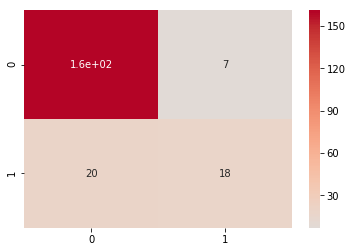

--------------------------------------------------


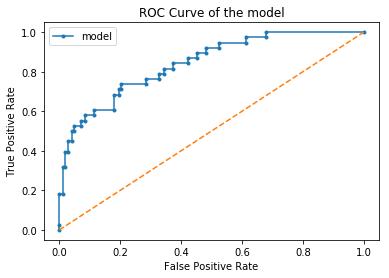

In [24]:
xgb_clf = xgb.XGBClassifier(n_estimators=1000, n_jobs=-1, random_state=seed, verbosity=1)
model_eval(xgb_clf)

### Random Forest Classifier

Accuracy  : 0.84
Precision : 1.00
Recall    : 0.13
ROC_AUC   : 0.57
--------------------------------------------------
Confusion Matrix:


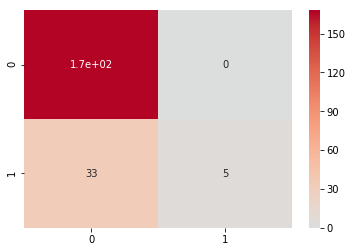

--------------------------------------------------


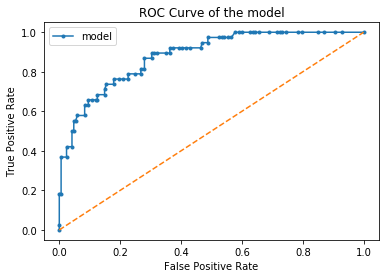

In [25]:
rf_clf = RandomForestClassifier(n_estimators= 2000, n_jobs=-1, random_state=seed, verbose=0)
model_eval(rf_clf)

### Logistic Regression

Accuracy  : 0.86
Precision : 0.68
Recall    : 0.50
ROC_AUC   : 0.72
--------------------------------------------------
Confusion Matrix:


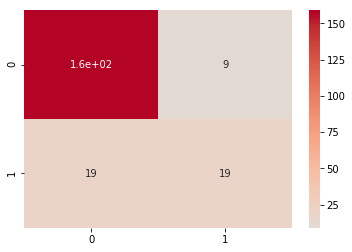

--------------------------------------------------


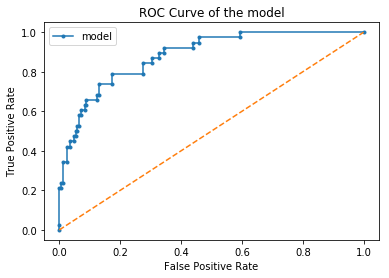

In [26]:
lr_clf = LogisticRegression(random_state = seed)
model_eval(lr_clf)

### SVM Classifier with RBF kernel

Accuracy  : 0.84
Precision : 1.00
Recall    : 0.13
ROC_AUC   : 0.57
--------------------------------------------------
Confusion Matrix:


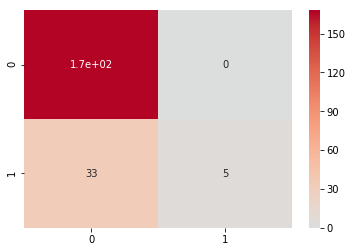

--------------------------------------------------


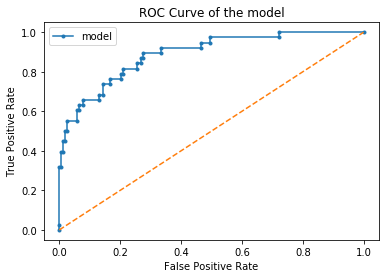

In [27]:
svc_clf = SVC(kernel='rbf', probability=True)
model_eval(svc_clf)

### Linear Discriminant Analysis (LDA) Classifier

Accuracy  : 0.87
Precision : 0.68
Recall    : 0.55
ROC_AUC   : 0.75
--------------------------------------------------
Confusion Matrix:


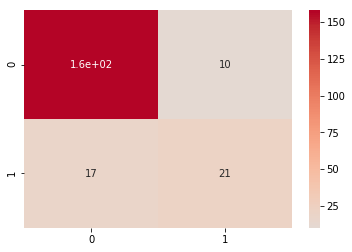

--------------------------------------------------


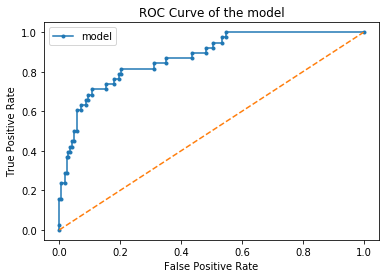

In [28]:
lda_clf = LinearDiscriminantAnalysis()
model_eval(lda_clf)

### Voting Classifier

Accuracy  : 0.88
Precision : 0.85
Recall    : 0.45
ROC_AUC   : 0.71
--------------------------------------------------
Confusion Matrix:


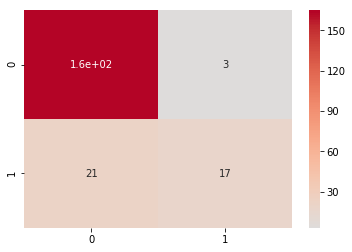

--------------------------------------------------


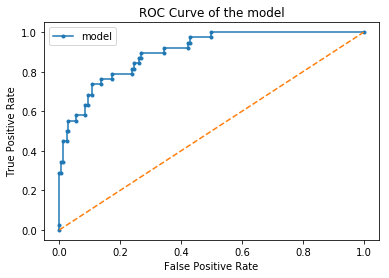

In [29]:
ensemble_clf = VotingClassifier(estimators=[('XGB', xgb_clf), ('RF', rf_clf), ('svc', svc_clf), 
                                            ('LR', lr_clf), ('LDA', lda_clf)],
                                            voting ='soft', weights=[1, 1, 1, 1, 1])
model_eval(ensemble_clf)